# Proyecto 1 NLP - Machine Learning

### OBJETIVO :  Implementar un modelo para reconocer el puntaje asignado a un ítem de Amazon a partir de la crítica que hace un/a usuario/a.

### Dataset: The Multilingual Amazon Reviews Corpus

<font color=00777>

## A - Exploración de Datos
+ Carga de los datasets
+ Elección del dataset
+ Pregunta sobre el dataset
+ División del dataset
+ Frecuencia de palabras
+ Selecion de columnas de interés
+ Lematización
+ Vectorización

<font color=00777>

## B - Machine Learning - Modelización

+ Separación del dataset en train y test
+ Elección de métricas y modelos
+ Creación de una función para graficar los resultados
+ Naive Bayes
+ Graficación de la matriz de confusión de Naive Bayes 
+ Random Forest Classifier
+ Graficación de la matriz de confusión de Random Forest Classifier
+ Respuesta a la pregunta sobre el dataset
+ Optimización de parámetros de Random Forest Classifier
+ Mejores parámetros de Random Forest Classifier
+ Random Forest Classifier Optimizado
+ Graficación de las palabras que está usando el modelo para predecir, importancia de las features.

<font color=00777>

## C - Investigación

+ Evaluación de los resultados y propuesta de mejora
+ Creación del dataset Binario
+ Flujo de trabajo
+ Evaluación de resultados con el dataset Binario
+ Flujo de trabajo con dataset de training de 200000 instancias
+ Mejores parámetros para Random Forest Classifier en dataset Binario con dataset de training
+ Random Forest Classifier Optimizado en dataset Binario con dataset de training


<font color=00777>

## Conclusiones y proyecto


<font color=00777>

# A - Exploración de Datos

  <font color=00777>_______________**Carga de los datasets**</font> 
   
 + Se cargan y exploran los 3 datasets y las librerías necesarias

 + Se verifica que los 3 están equilibrados en relación a la asignación de la cantidad de estrellas.


In [1]:
import itertools
import pandas as pd
import numpy as np
amazon_test = pd.read_json('dataset_es_test.json', lines= True)
amazon_train = pd.read_json('dataset_es_train.json', lines= True)
amazon_dev = pd.read_json('dataset_es_dev.json', lines= True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
dataset1 = pd.read_json('dataset_es_test.json', lines= True)
dataset1.shape

(5000, 8)

In [96]:
dataset2 = pd.read_json('dataset_es_train.json', lines= True)
dataset2.shape

(200000, 8)

In [97]:
dataset3 = pd.read_json('dataset_es_dev.json', lines= True)
dataset3.shape

(5000, 8)

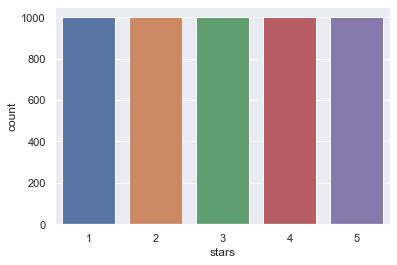

In [98]:
sns.countplot(dataset1.stars)
plt.show()

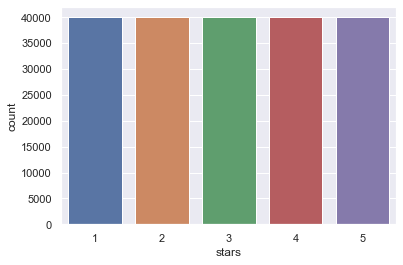

In [103]:
sns.countplot(dataset2.stars)
plt.show()

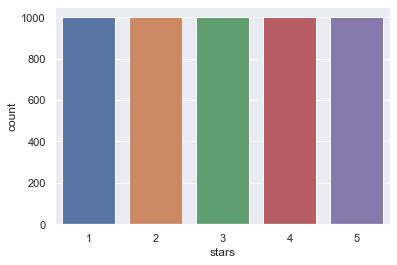

In [104]:
sns.countplot(dataset3.stars)
plt.show()

 <font color=00777>_______________**Elección del dataset**</font> 
   
 + Habiendo comprobado que los 3 datasets tienen la misma distribucuón, se elige para comenzar el 'dataset_es_dev.json' (development) que es el dataset para desarrollo, con solo 4000 intancias que será más agil computacionalmente para trabajar.
 + Se imprime solo una parte del dataset para inspeccionarlo, a modo representativo, aunque se leyeron muchas instancias con todas las calificaciones de 1 a 5 estrellas.

In [102]:
dataset3.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
5,es_0729140,product_es_0286879,reviewer_es_0041024,1,"Hola, después de recoger el paquete me ha lleg...",Bolas rotas,es,home
6,es_0475220,product_es_0313511,reviewer_es_0821388,1,"A parte de no poder elegir color, te envian el...",A parte de no poder elegir color...,es,home
7,es_0288584,product_es_0468628,reviewer_es_0429329,1,Muy baja calidad de ahí si precio. Esta compra...,Tapa pantalla,es,wireless
8,es_0975526,product_es_0025866,reviewer_es_0294670,1,El producto sale como entregado pero yo no he ...,NO HE RECIBIDO EL PRODUCTO,es,home_improvement
9,es_0337413,product_es_0433801,reviewer_es_0475664,1,"No lo recomiendo, no se pega y acaba despegandose",Una patata.,es,wireless


<font color=00777>______________**Pregunta sobre el dataset**</font> 
+ Cuales palabras son más frecuentes en cada categoría
+ Cómo influyen en el comportamiento del modelo de ML


<font color=00777>______________**División del dataset**</font> 

+ Se divide en 5 datasets 1 para cada calificación de estrellas
+ Se inpeccionó cada dataset y se imprime una parte a modo representativo.
+ Se decide que además de la columna de 'stars' que califica el producto y la experiencia de la compra, se trabajará unicamente con la columna 'review_title'. Habiendo inspeccionado los títulos y los comentarios de las experiencia de compra,con cada una de las distintas calificaciones, se llega a la conclusión que el comprador ya hizo mucho trabajo de síntesis al tener que colocar un título antes de ingresar el comentario. Por lo tanto de alguna manera ya adelantó parte del procesamiento que necesitamos hacer, si leemos con detenimiento hay mucho más sentimiento en los títulos que en los comentarios donde el mismo se diluye. 

In [105]:
dataset_1_estrella = dataset3[dataset3.stars==1]
dataset_1_estrella.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
5,es_0729140,product_es_0286879,reviewer_es_0041024,1,"Hola, después de recoger el paquete me ha lleg...",Bolas rotas,es,home
6,es_0475220,product_es_0313511,reviewer_es_0821388,1,"A parte de no poder elegir color, te envian el...",A parte de no poder elegir color...,es,home
7,es_0288584,product_es_0468628,reviewer_es_0429329,1,Muy baja calidad de ahí si precio. Esta compra...,Tapa pantalla,es,wireless
8,es_0975526,product_es_0025866,reviewer_es_0294670,1,El producto sale como entregado pero yo no he ...,NO HE RECIBIDO EL PRODUCTO,es,home_improvement
9,es_0337413,product_es_0433801,reviewer_es_0475664,1,"No lo recomiendo, no se pega y acaba despegandose",Una patata.,es,wireless


In [106]:
dataset_2_estrella = dataset3[dataset3.stars==2]
dataset_2_estrella.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
1000,es_0118732,product_es_0968323,reviewer_es_0145809,2,Me han enviado algo completamente diferente. E...,Muy mal,es,home
1001,es_0696968,product_es_0860895,reviewer_es_0999762,2,En menos de 2 semanas de uso una de las mangas...,Baja calidad de producto,es,kitchen
1002,es_0874902,product_es_0170859,reviewer_es_0981966,2,"Hicimos el pedido de la barrera, hasta ahí tod...",Decepcionados con el embalaje y el estado del ...,es,baby_product
1003,es_0773654,product_es_0429247,reviewer_es_0191603,2,Queda grande no es una S pero se puede arregla...,Mas o menos,es,apparel
1004,es_0532571,product_es_0293429,reviewer_es_0799746,2,En 5 días de uso se ha roto el pulsador de pue...,Poca calidad,es,home_improvement
1005,es_0630193,product_es_0555678,reviewer_es_0322978,2,"No cortan casi nada, a la niña no le gustan po...",Casi de juguete,es,office_product
1006,es_0420295,product_es_0493109,reviewer_es_0393674,2,Pues para una piscina 3 x 2 metros con 80cm en...,Podria ser mucho mejor,es,lawn_and_garden
1007,es_0655101,product_es_0930447,reviewer_es_0215569,2,"PUES LO DICHO, LO COMPRE PARA MI TABLET DE 7, ...","LA TABLET NO ME ENCAJO, LA DUNDA QUEDABA GRANDE",es,other
1008,es_0205862,product_es_0267139,reviewer_es_0349067,2,"Las cuchillas son bastante malas, no se si es ...",Cuchillas de afeitar,es,drugstore
1009,es_0558117,product_es_0789412,reviewer_es_0394355,2,"La impresión esta mal hecha, el libro tiene qu...",Venia impreso al reves,es,book


In [107]:
dataset_3_estrella = dataset3[dataset3.stars==3]
dataset_3_estrella.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
2000,es_0176929,product_es_0553307,reviewer_es_0240217,3,"Nos gusto por su color, tejido y calidad de es...",Encaja,es,lawn_and_garden
2001,es_0032372,product_es_0720285,reviewer_es_0348916,3,"Ha llegado rápido. , Es más pequeña de lo que ...",Simple.,es,luggage
2002,es_0446630,product_es_0413759,reviewer_es_0118864,3,Me ha gustado el producto,Buen producto,es,watch
2003,es_0001452,product_es_0619908,reviewer_es_0037222,3,"se despega rápido, lo que he hecho ha sido coc...",bien,es,kitchen
2004,es_0315490,product_es_0435465,reviewer_es_0988902,3,no parece tampoco muy especifico para animales...,BASICO,es,drugstore
2005,es_0508874,product_es_0746246,reviewer_es_0385820,3,"Para pintar el casco de una lancha, destiñe. A...",Regulera,es,home_improvement
2006,es_0121261,product_es_0514899,reviewer_es_0322376,3,"Muy buenos, la única pega es que las tapaderas...",Buen material,es,home
2007,es_0778601,product_es_0384552,reviewer_es_0246995,3,aceptable por su parte buen servicio,rapido,es,pet_products
2008,es_0745192,product_es_0045184,reviewer_es_0988448,3,Ne entra en la caja de interruptor/enchufe est...,Muy grande,es,home_improvement
2009,es_0877332,product_es_0982861,reviewer_es_0409408,3,Cumplen los requisitos que Yo buscaba para mí ...,Geniales.,es,furniture


In [108]:
dataset_4_estrella = dataset3[dataset3.stars==4]
dataset_4_estrella.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
3000,es_0638126,product_es_0921838,reviewer_es_0467790,4,Son robustas y francamente cumplen con su come...,Gran juego de llaves.,es,home_improvement
3001,es_0957542,product_es_0016810,reviewer_es_0205107,4,Estupenda relación calidad-precio,Funcional,es,home_improvement
3002,es_0571992,product_es_0161938,reviewer_es_0304170,4,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo,es,furniture
3003,es_0469900,product_es_0182832,reviewer_es_0562273,4,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN,es,home_improvement
3004,es_0832100,product_es_0922601,reviewer_es_0049840,4,Le doy cuatro estrellas porque aún no lo he pr...,Nice.,es,wireless
3005,es_0996286,product_es_0845418,reviewer_es_0790138,4,"Esta bien de precios, trae 2 packs. Son normal...",Calidad precio,es,drugstore
3006,es_0467067,product_es_0032571,reviewer_es_0623664,4,No me gusta las Instrucciones en ingles,Bastante completo,es,sports
3007,es_0052613,product_es_0423591,reviewer_es_0469066,4,Llego bien pero el último día tardo casi una s...,Cobran mucho por el envio,es,sports
3008,es_0911139,product_es_0123793,reviewer_es_0212350,4,Buena relación calidad precio. El único pero q...,Relación calidad precio excelente,es,personal_care_appliances
3009,es_0394621,product_es_0133538,reviewer_es_0828036,4,"Buenas calas, duraderas y resistentes.",Buen material y buen anclaje.,es,sports


In [109]:
dataset_5_estrella = dataset3[dataset3.stars==5]
dataset_5_estrella.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
4000,es_0973261,product_es_0163826,reviewer_es_0461590,5,"Mi pareja encantada con esta adquisición, prác...","Muy Útil, ligero y hace su papel para lo que es",es,toy
4001,es_0285657,product_es_0396230,reviewer_es_0837511,5,En cuanto lo compré mi gato se olvidó de rasca...,Funciona,es,pet_products
4002,es_0777148,product_es_0566248,reviewer_es_0269131,5,Café de excelente calidad. Las cápsulas sin al...,Cápsulas compatibles con maquina nespresso rec...,es,grocery
4003,es_0554747,product_es_0244949,reviewer_es_0800916,5,Te atrapa desde el primer minuto!!! Lectura fá...,Te atrapa,es,digital_ebook_purchase
4004,es_0685602,product_es_0991354,reviewer_es_0579306,5,"Está muy bien montado, y resulta muy vistoso. ...",que sea lo pedido,es,jewelry
4005,es_0021205,product_es_0130331,reviewer_es_0477335,5,"Si te gusta el uno, este tb te gustará",Muy divertido,es,video_games
4006,es_0569280,product_es_0765298,reviewer_es_0141672,5,Los chicles de frutas de toda la vida...! Qued...,Los chicles más deliciosos!,es,grocery
4007,es_0596631,product_es_0067800,reviewer_es_0790148,5,Satisfecho con la compra. Buen vendedor. Gracias,Satifecho con la compra,es,home
4008,es_0600281,product_es_0804294,reviewer_es_0147386,5,Funciona correctamente. Se puede instalar tant...,Recomendable,es,automotive
4009,es_0512335,product_es_0728970,reviewer_es_0054982,5,Extremadamente brillante! Esta luz es genial. ...,¡Me encanta lo brillantes que son!,es,home


<font color=00777>______________**Frecuencia de palabras**</font> 

+ Se visualiza la frecuencia de palabras para cada nuevo dataset

In [153]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords.remove('no')
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro',
 'vue

In [110]:
todos_Titulos_1_estrella = []
for i in range(dataset_1_estrella.shape[0]):
    Titulos_1_estrella = dataset_1_estrella.iloc[i].review_title
    Titulos_1_estrella = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(Titulos_1_estrella)
    Titulos_1_estrella = [word for word in Titulos_1_estrella if word not in stopwords]
    todos_Titulos_1_estrella.append(Titulos_1_estrella)

In [111]:
todos_Titulos_1_estrella = list(itertools.chain(*todos_Titulos_1_estrella))
todos_Titulos_1_estrella[0:10]

['Mala',
 'compra',
 'No',
 'recibido',
 'Que',
 'no',
 'aprieta',
 'bien',
 'manillar',
 'Brocas']

In [112]:
freq_1_estrella = nltk.FreqDist(todos_Titulos_1_estrella)
freq_1_estrella

FreqDist({'No': 211, 'no': 93, 'calidad': 50, 'producto': 35, 'Mala': 33, 'NO': 28, 'Se': 22, 'funciona': 22, 'Mal': 22, 'El': 21, ...})

In [113]:
dataset_1_estrella = pd.DataFrame(list(freq_1_estrella.items()), columns = ["Word","Frequency"])

In [114]:
dataset_1_estrella.sort_values('Frequency',ascending=False, inplace = True)

In [115]:
dataset_1_estrella.reset_index(drop = True, inplace=True)

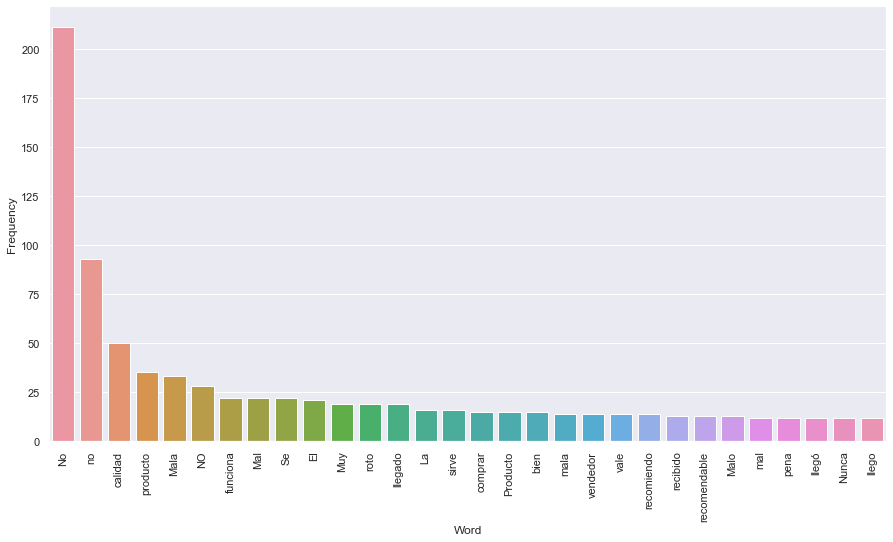

FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 1 ESTRELLA


In [117]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = dataset_1_estrella.iloc[:30].Word, y = dataset_1_estrella.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print('FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 1 ESTRELLA')

In [118]:
todos_Titulos_2_estrella = []
for i in range(dataset_2_estrella.shape[0]):
    Titulos_2_estrella = dataset_2_estrella.iloc[i].review_title
    Titulos_2_estrella = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(Titulos_2_estrella)
    Titulos_2_estrella = [word for word in Titulos_2_estrella if word not in stopwords]
    todos_Titulos_2_estrella.append(Titulos_2_estrella)

In [119]:
todos_Titulos_2_estrella = list(itertools.chain(*todos_Titulos_2_estrella))
todos_Titulos_2_estrella[0:10]

['Muy',
 'mal',
 'Baja',
 'calidad',
 'producto',
 'Decepcionados',
 'embalaje',
 '1er',
 'artículo',
 'Mas']

In [120]:
freq_2_estrella = nltk.FreqDist(todos_Titulos_2_estrella)
freq_2_estrella

FreqDist({'No': 165, 'no': 82, 'calidad': 63, 'bien': 37, 'Mala': 28, 'Muy': 27, 'Se': 24, 'Calidad': 21, 'funciona': 19, 'mala': 18, ...})

In [121]:
dataset_2_estrella = pd.DataFrame(list(freq_2_estrella.items()), columns = ["Word","Frequency"])

In [122]:
dataset_2_estrella.sort_values('Frequency',ascending=False, inplace = True)

In [123]:
dataset_2_estrella.reset_index(drop = True, inplace=True)

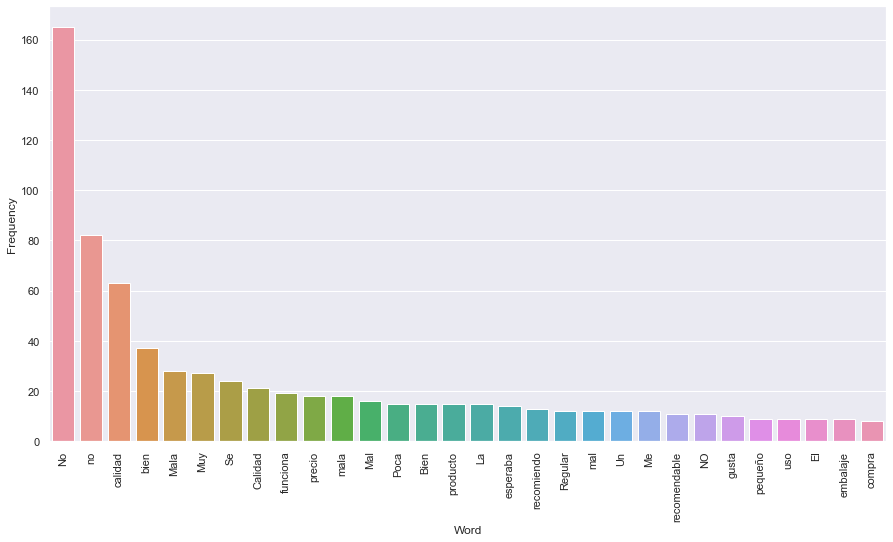

FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 2 ESTRELLAS


In [126]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = dataset_2_estrella.iloc[:30].Word, y = dataset_2_estrella.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print('FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 2 ESTRELLAS')

In [127]:
todos_Titulos_3_estrella = []
for i in range(dataset_3_estrella.shape[0]):
    Titulos_3_estrella = dataset_3_estrella.iloc[i].review_title
    Titulos_3_estrella = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(Titulos_3_estrella)
    Titulos_3_estrella = [word for word in Titulos_3_estrella if word not in stopwords]
    todos_Titulos_3_estrella.append(Titulos_3_estrella)

In [128]:
todos_Titulos_3_estrella = list(itertools.chain(*todos_Titulos_3_estrella))
todos_Titulos_3_estrella[0:10]

['Encaja',
 'Simple',
 'Buen',
 'producto',
 'bien',
 'BASICO',
 'Regulera',
 'Buen',
 'material',
 'rapido']

In [129]:
freq_3_estrella = nltk.FreqDist(todos_Titulos_3_estrella)
freq_3_estrella

FreqDist({'No': 96, 'bien': 63, 'no': 50, 'calidad': 48, 'precio': 46, 'mal': 32, 'Bien': 32, 'Muy': 29, 'Buena': 27, 'Correcto': 19, ...})

In [130]:
dataset_3_estrella = pd.DataFrame(list(freq_3_estrella.items()), columns = ["Word","Frequency"])

In [131]:
dataset_3_estrella.sort_values('Frequency',ascending=False, inplace = True)

In [132]:
dataset_3_estrella.reset_index(drop = True, inplace=True)

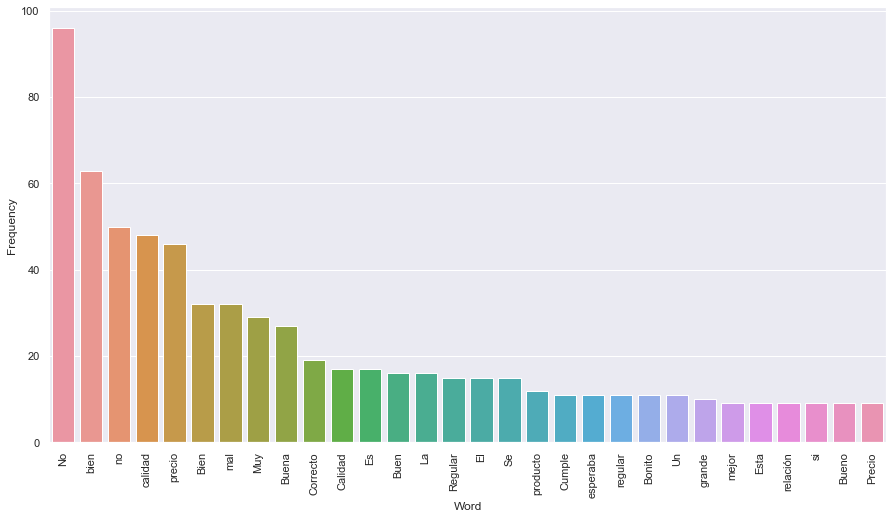

FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 3 ESTRELLAS


In [133]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = dataset_3_estrella.iloc[:30].Word, y = dataset_3_estrella.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print('FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 3 ESTRELLAS')

In [134]:
todos_Titulos_4_estrella = []
for i in range(dataset_4_estrella.shape[0]):
    Titulos_4_estrella = dataset_4_estrella.iloc[i].review_title
    Titulos_4_estrella = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(Titulos_4_estrella)
    Titulos_4_estrella = [word for word in Titulos_4_estrella if word not in stopwords]
    todos_Titulos_4_estrella.append(Titulos_4_estrella)

In [135]:
todos_Titulos_4_estrella = list(itertools.chain(*todos_Titulos_4_estrella))
todos_Titulos_4_estrella[0:10]

['Gran',
 'juego',
 'llaves',
 'Funcional',
 'compacto',
 'cómodo',
 'ESTA',
 'BIEN',
 'Nice',
 'Calidad']

In [136]:
freq_4_estrella = nltk.FreqDist(todos_Titulos_4_estrella)
freq_4_estrella

FreqDist({'precio': 84, 'Buena': 74, 'Muy': 74, 'calidad': 69, 'bien': 65, 'Buen': 51, 'producto': 36, 'buena': 33, 'Bien': 32, 'Calidad': 27, ...})

In [137]:
dataset_4_estrella = pd.DataFrame(list(freq_4_estrella.items()), columns = ["Word","Frequency"])

In [138]:
dataset_4_estrella.sort_values('Frequency',ascending=False, inplace = True)

In [139]:
dataset_4_estrella.reset_index(drop = True, inplace=True)

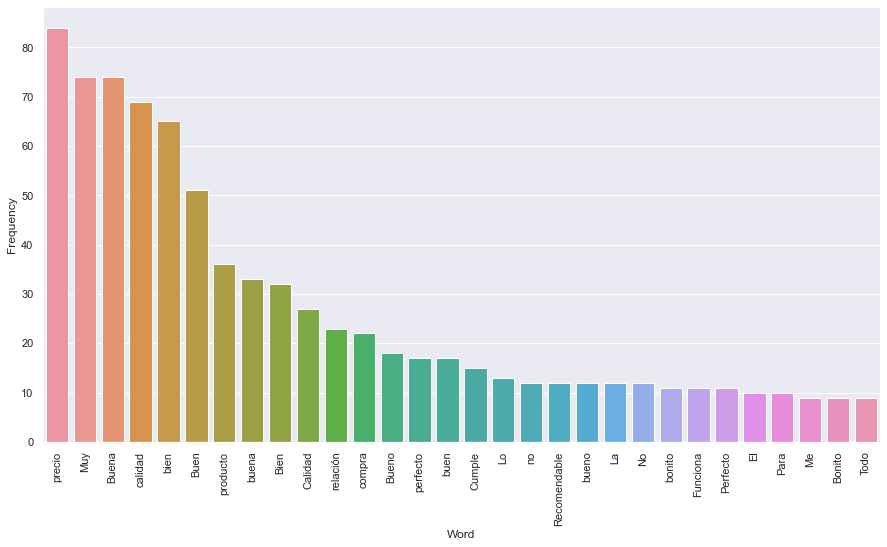

FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 4 ESTRELLAS


In [141]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = dataset_4_estrella.iloc[:30].Word, y = dataset_4_estrella.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print('FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 4 ESTRELLAS')

In [142]:
todos_Titulos_5_estrella = []
for i in range(dataset_5_estrella.shape[0]):
    Titulos_5_estrella = dataset_5_estrella.iloc[i].review_title
    Titulos_5_estrella = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(Titulos_5_estrella)
    Titulos_5_estrella = [word for word in Titulos_5_estrella if word not in stopwords]
    todos_Titulos_5_estrella.append(Titulos_5_estrella)

In [143]:
todos_Titulos_5_estrella = list(itertools.chain(*todos_Titulos_5_estrella))
todos_Titulos_5_estrella[0:10]

['Muy',
 'Útil',
 'ligero',
 'hace',
 'papel',
 'Funciona',
 'Cápsulas',
 'compatibles',
 'maquina',
 'nespresso']

In [144]:
freq_5_estrella = nltk.FreqDist(todos_Titulos_5_estrella)
freq_5_estrella

FreqDist({'Muy': 100, 'calidad': 73, 'Perfecto': 48, 'Buen': 46, 'precio': 44, 'bien': 42, 'producto': 42, 'Buena': 41, 'buen': 38, 'buena': 32, ...})

In [145]:
dataset_5_estrella = pd.DataFrame(list(freq_5_estrella.items()), columns = ["Word","Frequency"])

In [146]:
dataset_5_estrella.sort_values('Frequency',ascending=False, inplace = True)

In [147]:
dataset_5_estrella.reset_index(drop = True, inplace=True)

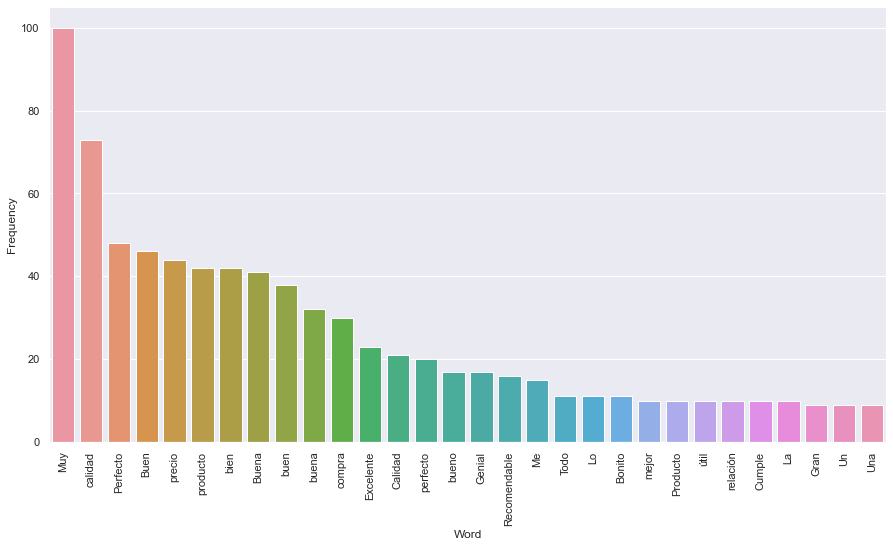

FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 5 ESTRELLAS


In [148]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = dataset_5_estrella.iloc[:30].Word, y = dataset_5_estrella.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print('FRECUENCIA DE PALABRAS EN TÍTULOS CON CALIFICACIÓN 5 ESTRELLAS')

In [149]:
dataset3 = pd.read_json('dataset_es_dev.json', lines= True)
dataset3.head(3)



,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports


<font color=00777>______________**Selección de las columnas de interés**</font> 
+ Se toman del dataset las columnas 'review_title' y 'stars'

In [154]:
dataset3=pd.concat([dataset3.review_title, dataset3.stars],axis=1)
dataset3.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset3.head()

,review_title,stars
0,Mala compra,1
1,No lo he recibido,1
2,Que no aprieta bien en el manillar,1
3,Brocas de mantequilla,1
4,No me gusta,1


<font color=00777>

### **___________________ Lematización**</font> 
+ Se cargan las librerías y las funciones necesarias para efectuar la lematización de los títulos.

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [158]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplazar caracteres
import re
dataset3 = pd.read_json('dataset_es_dev.json', lines= True)
dataset3.head(30)

dataset3 = pd.concat([dataset3.review_title,dataset3.stars],axis=1)
dataset3.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [159]:
Titulos_list=[]
for Titulos in dataset3.review_title:
    # Vamos a reemplazar los caracteres que no sean letras por espacios
    Titulos=re.sub("[^a-zA-Z]"," ",str(Titulos))
    # Pasamos todo a minúsculas
    Titulos=Titulos.lower()
    # Tokenizamos para separar las palabras
    Titulos=nltk.word_tokenize(Titulos)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in Titulos]
    
    
    #Nos quedamos con las palabras que tengan a partir de 2 letras.
    Titulos = [palabra for palabra in Titulos if len(palabra)>1]
    # Sacamos las Stopwords
    Titulos = [palabra for palabra in Titulos if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    Titulos =" ".join(Titulos)
    Titulos_list.append(Titulos)

In [160]:
dataset3["titular_lemm"] = Titulos_list
dataset3.tail()

,review_title,stars,titular_lemm
4995,guadalupe,5,guadalupe
4996,calidad precio,5,calidad precio
4997,Excelente,5,excelente
4998,Genial,5,genial
4999,Buena calidad,5,buena calidad


<font color=00777>______________**Dataset lematizado**</font> 
+ Creamos un dataset con los titulos lematizados y la columna de estrellas.

In [161]:
dataset3_lemm = pd.concat([dataset3.titular_lemm,dataset3.stars],axis=1)
dataset3_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulos vacios
dataset3_lemm.tail()

,titular_lemm,stars
4995,guadalupe,5
4996,calidad precio,5
4997,excelente,5
4998,genial,5
4999,buena calidad,5


<font color=00777>

### **___________________ Vectorización**</font> 
+ Tomamos las palabras y el vector de clasificación.
+ Cargamos la librería con las funcionalidades para vectorizar

In [162]:
# Tomamos la lista de palabras y el vector que nos dice su clasificación

list_titulos = list(dataset3_lemm['titular_lemm'].values)

Stars = dataset3_lemm['stars'].values

In [163]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1,2))#stop_words='spanish') 

+ Generamos los vectores para cada título a aprtir del corpus total.

In [164]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['aburrido', 'acabado', 'acabados', 'aceptable', 'aconsejable', 'acorde', 'ada', 'adapta', 'adaptador', 'adecuado', 'ado', 'agradable', 'agua', 'aguanta', 'ahora', 'ajusta', 'ajusta bien', 'ajuste', 'alivia', 'alta', 'altavoz', 'altura', 'amarillea', 'amazon', 'ameno', 'an', 'ana', 'anillas', 'antena', 'antonio', 'anunciado', 'aparatoso', 'apto', 'apuro', 'arrugado', 'art', 'art culo', 'articulo', 'as', 'aspirador', 'aun', 'aunque', 'auriculares', 'auriculares buen', 'ayuda', 'azul', 'ba', 'baja', 'baja calidad', 'bajo']


<font color=00777>

# B - Machine Learning - Modelización

<font color=00777>______________**Separación el dataset en train y test**</font> 

In [168]:
x = matriz_titulos.toarray()
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

<font color=00777>______________**Creación una función para graficar los resultados**</font> 

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

<font color=00777>______________**Elección de métricas y modelos**</font> 
+ Se eligen como métricas Exactitud (Accurancy) y Matriz de Confusión, la primera nos dará una idea del funcionamiento del modelo y la segunda nos dirá dónde está fallando.
+ Se tomará el problema como un tema de clasificación, por lo que se elige como modelo Random Forest Classifier y se lo comparará con Naive Bayes como benchmark.

<font color=00777>______________**Naive Bayes**</font> 

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("Accurancy Naive Bayes, Gaussian(test): ",nb.score(xtest,ytest))
print("Accurancy Naive Bayes, Gaussian(train): ",nb.score(xtrain,ytrain))

Accurancy Naive Bayes, Gaussian(test):  0.335
Accurancy Naive Bayes, Gaussian(train):  0.462


<font color=00777>______________**Graficación de la Matriz de Confusión de Naive Bayes**</font> 

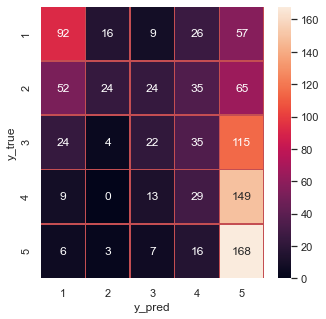

In [17]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

<font color=00777>______________**Random Forest Classifier**</font> 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
print("Accurancy Random Forest (test): ",rf.score(xtest,ytest))
print("Accurancy Random Forest (train): ",rf.score(xtrain,ytrain))

Accurancy Random Forest (test):  0.385
Accurancy Random Forest (train):  0.7155


<font color=00777>______________**Graficación la Matriz de Confusión de Random Forest Classifier**</font> 

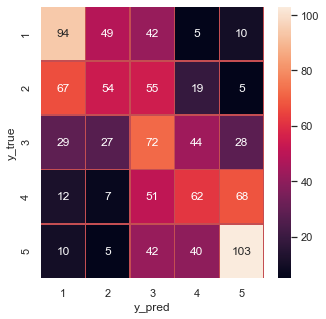

In [19]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

<font color=00777>______________**Respuesta a la pregunta sobre el dataset**</font> 
+ Las palabras más frecuentes en cada categoría se pueden visualizar en los gráficos que anteceden en la parte del análisis,
+ La influencia que tienen en el modelo, es más visible en la Matriz de Confusión de Random Forest Classifier, una vez lematizados y detectar con qué otras palabras vienen acompañadas en los títulos,el modelo parece comprender muy bien el significado de las palabras MUY y NO, para ubicar en los extremos a esos títulos, y parece equivocarse un poco más en la categoría de 3 estrellas, que aunque la palabra No tiene mucha frecuencia, el lematizador pareció entender que dependiendo de su asociación con otras palabras, no determina un sentimiento negativo. En cambio se le hace más dificil comprender el significado de esas asociaciones con las palabras MUY, CALIDAD, PRECIO,para la calificación de 4 estrellas y BUEN, NO, CALIDAD, y MALA, para la calificación de 2 estrellas.  

<font color=00777>______________**Optimización de parámetros de Random Forest Classifier**</font> 
+ Se elige el modelo que tuvo mejores resultados para optimizar

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import sys
import warnings

warnings.filterwarnings("ignore")

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 5, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
x = matriz_titulos.toarray()
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


{'n_estimators': 644,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

<font color=00777>______________**Mejores parámetros para Random Forest Classifier en dataset con clasificación de 1 a 5 estrellas**</font> 

+ n_estimators: 644
+ min_samples_split: 10
+ min_samples_leaf: 1
+ max_features: sqrt
+ max_depth: None
+ bootstrap: True

<font color=00777>______________**Random Forest Classifier Optimizado**</font> 

In [38]:
RF_Opt = RandomForestClassifier( n_estimators=644,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=True)

In [39]:
RF_Opt.fit(xtrain, ytrain)
y_train_pred = RF_Opt.predict(xtrain)
y_test_pred = RF_Opt.predict(xtest)

In [40]:
print("Accurancy Forest Optimizado (train): ",RF_Opt.score(xtrain,ytrain))
print("Accurancy Forest Optimizado (test): ",RF_Opt.score(xtest,ytest))

Accurancy Forest Optimizado (train):  0.6795
Accurancy Forest Optimizado (test):  0.388


<font color=00777>______________**Graficación de las palabras que está usando el modelo para predecir, la importancia de las features**</font> 

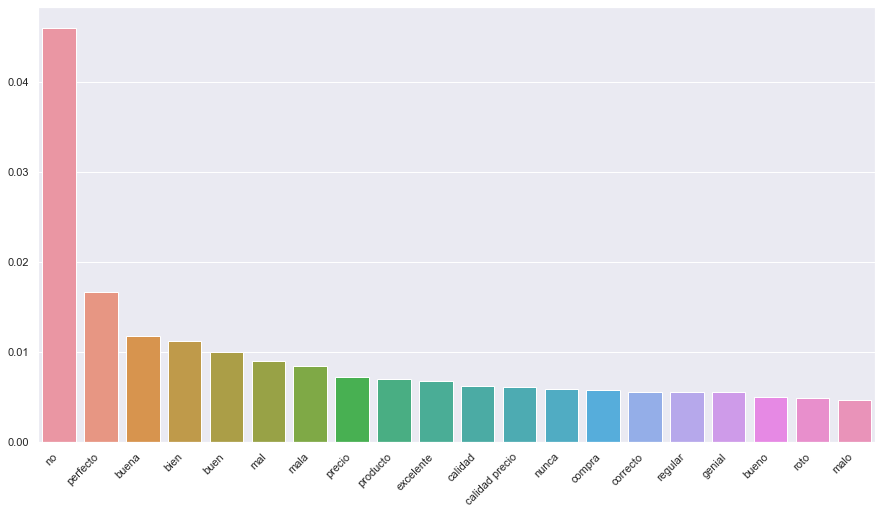

IMPORTACIA DE LAS PALABRAS CON LAS QUE PREDICE EL MODELO


In [195]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = RF_Opt.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))

ax=sns.barplot(selected_columns, selected_importances)
xlabels=selected_columns
ax.set_xticklabels(xlabels, rotation=45, ha='right')
plt.show()
print('IMPORTACIA DE LAS PALABRAS CON LAS QUE PREDICE EL MODELO')





<font color=00777>

# C - Investigación

<font color=00777>______________**Evaluación de los resultados y propuesta de mejora**</font> 
+ El modelo Random Forest Classifier resultó más eficiente que Naive Bayes, pero aún optimizado sólo pudo mejorar su rendimiento en test en 3 cententésimas. 
+ Se propone probar si tendrá mejor rendimiento en un dataset binario.
+ Haciendo foco en este problema en particular sería mucho más útil, la información que se tendría serviría para dividir el universo de clientes entre los que están satisfechos y los que no,con más certeza. 
+ Permitiría iniciar acciones para mitigar los daños en la relación con el cliente insatisfecho y fidelizar del satisfecho.
+ Una campaña de esta naturaleza tendría que basarse en un resultado del modelo más acertivo.



<font color=00777>______________**Creación del dataset binario**</font> 
+ Se usará nuevamente el dataset para desarrollo.
+ Se unificarán los valores de 1 y 2 estrellas como Experiencia Negativa y los de 4 y 5 como Experiencia Positiva.
+ Se eliminarán los valores de 3 estrellas porque no aportan en este análisis.

In [51]:
datasetBinario = pd.read_json('dataset_es_dev.json', lines= True)

In [52]:
datasetBinario = datasetBinario.drop(datasetBinario[datasetBinario['stars']==3].index)

In [53]:
datasetBinario['stars']=datasetBinario['stars'].replace(1,0)
datasetBinario['stars']=datasetBinario['stars'].replace(2,0)
datasetBinario['stars']=datasetBinario['stars'].replace(4,1)
datasetBinario['stars']=datasetBinario['stars'].replace(5,1)

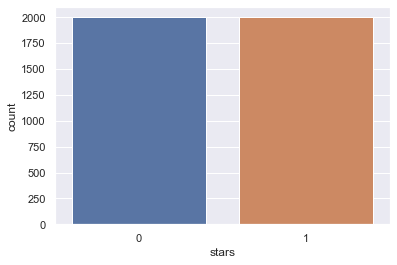

In [54]:
sns.countplot(datasetBinario.stars)
plt.show()

<font color=00777>______________**Flujo de trabajo**</font> 
+ Se procederá con los mismos pasos que se resolvió para el dataset de 1 a 5 estrellas.

In [55]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [60]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplazar caracteres
import re

datasetBinario = pd.concat([datasetBinario.review_title,datasetBinario.stars],axis=1)
datasetBinario.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [61]:
Titulos_list=[]
for Titulos in datasetBinario.review_title:
    # Vamos a reemplazar los caracteres que no sean letras por espacios
    Titulos=re.sub("[^a-zA-Z]"," ",str(Titulos))
    # Pasamos todo a minúsculas
    Titulos=Titulos.lower()
    # Tokenizamos para separar las palabras
    Titulos=nltk.word_tokenize(Titulos)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in Titulos]
    
    
    #Eliminamos las palabras de menos de 2 letras
    Titulos = [palabra for palabra in Titulos if len(palabra)>1]
    # Sacamos las Stopwords
    Titulos = [palabra for palabra in Titulos if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    Titulos =" ".join(Titulos)
    Titulos_list.append(Titulos)

In [62]:
datasetBinario["titular_lemm"] = Titulos_list
datasetBinario.tail()

,review_title,stars,titular_lemm
4995,guadalupe,1,guadalupe
4996,calidad precio,1,calidad precio
4997,Excelente,1,excelente
4998,Genial,1,genial
4999,Buena calidad,1,buena calidad


In [64]:
datasetBinario_lemm = pd.concat([datasetBinario.titular_lemm,datasetBinario.stars],axis=1)
datasetBinario_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
datasetBinario_lemm.tail()

,titular_lemm,stars
4995,guadalupe,1
4996,calidad precio,1
4997,excelente,1
4998,genial,1
4999,buena calidad,1


In [65]:
# Tomamos la lista de palabras y el vector que nos dice la calificación

list_titulos = list(datasetBinario_lemm['titular_lemm'].values)

Stars = datasetBinario_lemm['stars'].values

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1,2))

In [67]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abierta', 'abriga', 'aburrido', 'acabado', 'acabados', 'aceptable', 'acorde', 'adapta', 'adapta bien', 'adaptador', 'adecuado', 'ado', 'agua', 'aguanta', 'agujeros', 'ahora', 'ajusta', 'ajuste', 'alivia', 'amazon', 'amazon no', 'an', 'ana', 'antena', 'antonio', 'anunciado', 'apropiado', 'apto', 'apuro', 'ar', 'aroma', 'art', 'art culo', 'articulo', 'as', 'atrasa', 'aun', 'aunque', 'auriculares', 'ayuda', 'azul', 'ba', 'baja', 'baja calidad', 'bandeja', 'barata', 'barato', 'barato sale', 'baratos', 'barra']


In [68]:
x = matriz_titulos.toarray()
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print('Train/Test Set Sizes : ',xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

Train/Test Set Sizes :  (3200, 1000) (800, 1000) (3200,) (800,)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfBinario = RandomForestClassifier()
rfBinario.fit(xtrain,ytrain)
print("Accurancy Random Forest en Dataset Binario (test): ",rfBinario.score(xtest,ytest))
print("Accurancy Random Forest en Dataset Binario (train): ",rfBinario.score(xtrain,ytrain))

Accurancy Random Forest en Dataset Binario (test):  0.8225
Accurancy Random Forest en Dataset Binario (train):  0.906875


<font color=00777>______________**Evaluación de resultados con el dataset Binario**</font> 
+ El resultado es satisfactorio porque el rendimiento del modelo mejoró su Accurancy en test de 0.388 a 0.8225.

<font color=00777>______________**Flujo de trabajo con dataset de training de 200000 instancias**</font> 
+ Por lo tanto se volverá a ejecutar el mismo flujo de trabajo sobre el dataset de training con 200000 instancias, para aprovechar un entrenamiento con un dataset de mayor tamaño y obtener mejores resultados.

In [71]:
datasetFinal = pd.read_json('dataset_es_train.json', lines= True)

In [72]:
datasetFinal = datasetFinal.drop(datasetFinal[datasetFinal['stars']==3].index)

In [73]:
datasetFinal['stars']=datasetFinal['stars'].replace(1,0)
datasetFinal['stars']=datasetFinal['stars'].replace(2,0)
datasetFinal['stars']=datasetFinal['stars'].replace(4,1)
datasetFinal['stars']=datasetFinal['stars'].replace(5,1)

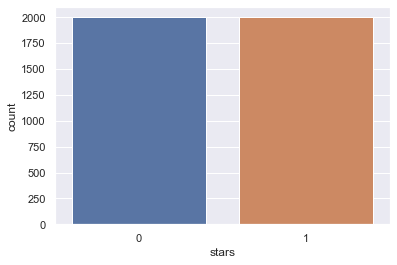

In [74]:
sns.countplot(datasetBinario.stars)
plt.show()

In [75]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [76]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplazar caracteres
import re

datasetFinal = pd.concat([datasetFinal.review_title,datasetFinal.stars],axis=1)
datasetFinal.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [77]:
Titulos_list=[]
for Titulos in datasetFinal.review_title:
    # Vamos a reemplazar los caracteres que no sean letras por espacios
    Titulos=re.sub("[^a-zA-Z]"," ",str(Titulos))
    # Pasamos todo a minúsculas
    Titulos=Titulos.lower()
    # Tokenizamos para separar las palabras
    Titulos=nltk.word_tokenize(Titulos)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in Titulos]
    
    
    #Eliminamos las palabras de 1 letra
    Titulos = [palabra for palabra in Titulos if len(palabra)>1]
    # Sacamos las Stopwords
    Titulos = [palabra for palabra in Titulos if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    Titulos =" ".join(Titulos)
    Titulos_list.append(Titulos)

In [78]:
datasetFinal["titular_lemm"] = Titulos_list
datasetFinal.tail()

,review_title,stars,titular_lemm
199995,Tal y como se describe,1,tal describe
199996,Funciona perfectamente,1,funciona perfectamente
199997,Buena calidad.,1,buena calidad
199998,Recomendado,1,recomendado
199999,Preciosas,1,preciosas


In [79]:
datasetFinal_lemm = pd.concat([datasetFinal.titular_lemm,datasetFinal.stars],axis=1)
datasetFinal_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
datasetFinal_lemm.tail()

,titular_lemm,stars
199995,tal describe,1
199996,funciona perfectamente,1
199997,buena calidad,1
199998,recomendado,1
199999,preciosas,1


In [80]:
# Tomamos la lista de palabras y el vector que nos dice la calificación

list_titulos = list(datasetFinal_lemm['titular_lemm'].values)

Stars = datasetFinal_lemm['stars'].values

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1,2))

In [82]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abierta', 'abierto', 'acabado', 'acabados', 'accesorios', 'aceite', 'aceptable', 'acierto', 'aconsejable', 'aconsejo', 'acorde', 'ada', 'adapta', 'adaptador', 'adecuado', 'adhesivo', 'ado', 'agradable', 'agua', 'aguanta', 'ahora', 'aire', 'ajusta', 'ajusta bien', 'ajuste', 'alta', 'altavoz', 'alto', 'amazon', 'an', 'ana', 'antonio', 'anunciado', 'anuncio', 'aparato', 'apenas', 'apto', 'art', 'art culo', 'articulo', 'as', 'aspecto', 'atenci', 'atenci cliente', 'audio', 'aun', 'aunque', 'auriculares', 'ayuda', 'ba']


In [83]:
x = matriz_titulos.toarray()
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print('Train/Test Set Sizes : ',xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

Train/Test Set Sizes :  (128000, 1000) (32000, 1000) (128000,) (32000,)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfFinal = RandomForestClassifier()
rfFinal.fit(xtrain,ytrain)

RandomForestClassifier()

In [86]:
print("Accurancy Random Forest en Dataset Binario Final (test): ",rfFinal.score(xtest,ytest))
print("Accurancy Random Forest en Dataset Binario Final (train): ",rfFinal.score(xtrain,ytrain))

Accurancy Random Forest en Dataset Binario Final (test):  0.83940625
Accurancy Random Forest en Dataset Binario Final (train):  0.8729375


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 5, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [88]:
x = matriz_titulos.toarray()
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [89]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 127.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 1200.3min finished


{'n_estimators': 644,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

<font color=00777>______________**Mejores parámetros para Random Forest Classifier en dataset Binario con Dataset de training**</font> 

+ n_estimators: 644
+ min_samples_split: 10
+ min_samples_leaf: 1
+ max_features: sqrt
+ max_depth: None
+ bootstrap: True

<font color=00777>______________**Random Forest Classifier Optimizado en dataset Binario con dataset de training**</font> 


In [91]:
RF_Binario_Opt = RandomForestClassifier( n_estimators=644,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=True)

In [92]:
RF_Binario_Opt.fit(xtrain, ytrain)
y_train_pred = RF_Binario_Opt.predict(xtrain)
y_test_pred = RF_Binario_Opt.predict(xtest)

In [94]:
print("Accurancy Random Forest con Dataset Binario Optimizado (test): ",RF_Binario_Opt.score(xtest,ytest))
print("Accurancy Random Forest con Dataset Binario Optimizado (train): ",RF_Binario_Opt.score(xtrain,ytrain))

Accurancy Random Forest con Dataset Binario Optimizado (test):  0.8410625
Accurancy Random Forest con Dataset Binario Optimizado (train):  0.8687265625


<font color=00777>

# Conclusiones y proyecto

+ La conversión del problema a un dataset binario, resultó efectiva, los errores del modelo se concentraban en las categorías de 2 y 4 estrellas, al convertir el modelo se consolidó en los extremos.
+ Se logró mejorar el Accurancy en test de 0,388 a 0,841 lo que representa una mejora considerable.
+ El modelo es también más consistente ya que la diferencia en el Accurancy entre test y train es sólo 2 centésimas.
+ Este resultado justificaría la inversión de usar el modelo para identificar el universo de clientes satisfechos y los que no y diseñar una acción de marketing en correspondencia.